**Note, before running the code**

The dataset and glove file are placed in google disk directory. 

To run a code easily create a folder "Colab" in the root folder of google drive and place dataset with the glove file.

The glove file can be downloaded from this link: 
https://drive.google.com/file/d/1fDpOkz9wPI-5rcvZKqvxN2KMEZLnJ1Se/view?usp=sharing

Thank you!!! 🥰

In [ ]:
#Importing stuff...
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, Conv1D, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

By looking at csv file we can see the data separated by **\t**

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 
Path='drive/My Drive/Colab'

#reasing the csv file and separating values by \t
tweets = pd.read_csv(Path+'/Sentiment140.tenPercent.sample.tweets.tsv',sep='\t', header=[0])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tweets.isnull().values.any()

tweets.shape

(160000, 2)

In [ ]:
tweets.head(15)

,sentiment_label,tweet_text
0,4,"@elephantbird Hey dear, Happy Friday to You A..."
1,4,Ughhh layin downnnn Waiting for zeina to co...
2,0,"@greeniebach I reckon he'll play, even if he's..."
3,0,@vaLewee I know! Saw it on the news!
4,0,very sad that http://www.fabchannel.com/ has c...
5,0,@Fearnecotton who sings 'I Remember'? i always...
6,4,With God on ur side anything is possible....
7,0,@LoveSmrs why being stupid?
8,0,Having delved back into the guts of Expression...
9,0,@emoskank awww take him with you!


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'sentiment distribution')

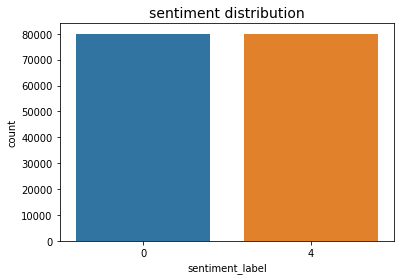

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

x='sentiment_label'
features = [c for c in tweets.columns if c not in [x]]
sns.countplot(tweets[x])
plt.title("sentiment distribution", fontsize=14)

In [ ]:
#Here we are replacing 4 for 1 to make a more comprehensible, so for 1 - positive sentiment, 0 - negative/neutral
 
tweets.replace({4:1}, inplace=True)

Text(0.5, 1.0, 'sentiment distribution')

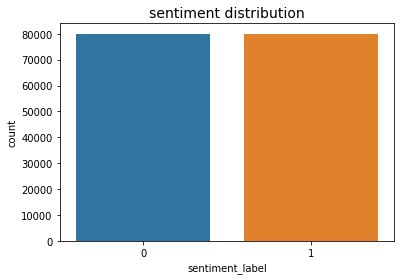

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

x='sentiment_label'
features = [c for c in tweets.columns if c not in [x]]
sns.countplot(tweets[x])
plt.title("sentiment distribution", fontsize=14)

In [ ]:
#check for null values

(tweets.isnull().sum() / len(tweets))*100

sentiment_label    0.0
tweet_text         0.0
dtype: float64

Now, let's clen up the data of tweets

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import string
import pickle
#template for links:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
#template for user nicknames:
userPattern = '@[^\s]+'

#processing the tweets in he's -> he is manner
def process_tweets(tweet):
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)  
    
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = re.sub(r"yrs", "years", tweet)
    tweet = re.sub(r"hrs", "hours", tweet)
    tweet = re.sub(r"2morow|2moro", "tomorrow", tweet)
    tweet = re.sub(r"2day", "today", tweet)
    tweet = re.sub(r"4got|4gotten", "forget", tweet)
    tweet = re.sub(r"b-day|bday", "b-day", tweet)
    tweet = re.sub(r"mother's", "mother", tweet)
    tweet = re.sub(r"mom's", "mom", tweet)
    tweet = re.sub(r"dad's", "dad", tweet)
    tweet = re.sub(r"hahah|hahaha|hahahaha", "haha", tweet)
    tweet = re.sub(r"lmao|lolz|rofl", "lol", tweet)
    tweet = re.sub(r"thanx|thnx", "thanks", tweet)
    tweet = re.sub(r"goood", "good", tweet)
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet) 
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #tokens = [w for w in tokens if len(w)>2]
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [ ]:
#defining abbrevs
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "a.m" : "before midday",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "dm" : "direct message",
    "eet" : "eastern european time",
    "eg" : "example",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fyi" : "for your information",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "gr8" : "great",
    "idc" : "i do not care",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "IG" : "instagram",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "lol" : "laughing out loud",
    "pm" : "prime minister",
    "rofl" : "rolling on the floor laughing",
    "rt" : "retweet",
    "tbh" : "to be honest",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "u" : "you",
    "u2" : "you too",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "zzz" : "sleeping bored and tired"
}


In [ ]:
#defining emojis

emoji = {
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":‑D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }

In [ ]:
#converting pandas object to a string type
tweets['tweet_text'] = tweets['tweet_text'].astype('str')

In [ ]:
#function to convert abrev into the text
def convert_abbrev_in_text(tweet_text):
    t=[]
    words=tweet_text.split()
    t = [abbreviations[w.lower()] if w.lower() in abbreviations.keys() else w for w in words]
    return ' '.join(t) 
#funstion to convert enojis into the text
def convert_emoji_in_text(tweet_text):
    t=[]
    words=tweet_text.split()
    t = [emoji[w.lower()] if w.lower() in emoji.keys() else w for w in words]
    return ' '.join(t) 

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#processing the tweeets......
tweets['processed_tweets'] = tweets['tweet_text'].apply(lambda x: process_tweets(x))
tweets['processed_tweets'] = tweets['processed_tweets'].apply(lambda x: convert_abbrev_in_text(x))
tweets['processed_tweets'] = tweets['processed_tweets'].apply(lambda x: convert_emoji_in_text(x))

#let's see the result!
print('Text Preprocessing complete.')
tweets

Text Preprocessing complete.


,sentiment_label,tweet_text,processed_tweets
0,1,"@elephantbird Hey dear, Happy Friday to You A...",elephantbird hey dear happy friday already ric...
1,1,Ughhh layin downnnn Waiting for zeina to co...,ghhh layin downnnn waiting zeina cook breakfast
2,0,"@greeniebach I reckon he'll play, even if he's...",greeniebach reckon play even 100but know nothi...
3,0,@vaLewee I know! Saw it on the news!,valewee know saw news
4,0,very sad that http://www.fabchannel.com/ has c...,ery sad closed one web service used year
...,...,...,...
159995,0,STILL @ panera...studying for &quot;mock&quot;...,till panerastudying quotmockquot board exam to...
159996,0,Insomnia is out of control tonight--haven't sl...,nsomnia control tonighthave slept wink
159997,1,@Covergirl08 I take pride in what I do,covergirl08 take pride
159998,1,heading to work on the 6,eading work


In [ ]:
#Now, lets remove shortwords
tweets['processed_tweets']=tweets['processed_tweets'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
tweets.head(5)

,sentiment_label,tweet_text,processed_tweets
0,1,"@elephantbird Hey dear, Happy Friday to You A...",elephantbird dear happy friday already rice bo...
1,1,Ughhh layin downnnn Waiting for zeina to co...,ghhh layin downnnn waiting zeina cook breakfast
2,0,"@greeniebach I reckon he'll play, even if he's...",greeniebach reckon play even 100but know nothi...
3,0,@vaLewee I know! Saw it on the news!,valewee know news
4,0,very sad that http://www.fabchannel.com/ has c...,closed service used year


In [ ]:
from sklearn.utils import shuffle
#shuffling the tweets for better performance
tweets =  shuffle(tweets).reset_index(drop=True)

In [ ]:
#tokenizing....
tokenized_tweet=tweets['processed_tweets'].apply(lambda x: x.split())
tokenized_tweet.head(5)

0               [pstairs, watching, movie, much, pain]
1                     [slept, 14hours, allowed, tired]
2               [longer, friendly, term, burned, sick]
3    [asianminga, definitely, hopefully, soonmy, wa...
4    [shreenas, would, love, visit, chicago, secure...
Name: processed_tweets, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#and vectorizing before using naive bayes
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(tweets['processed_tweets'].values.astype('U'))

Training model!!!

In [ ]:
from sklearn.model_selection import train_test_split
X=text_counts
y=tweets['sentiment_label'].astype('int')
#spliting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=18)

# Naive Bayes

In [ ]:
#building naive bayes model....
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *

model = ComplementNB()
model.fit(X_train, y_train)
cross_model = cross_val_score(model, X, y,n_jobs = -1)
print("Cross Valid= ",cross_model)                
print ("Train accuracy ={:.2f}%".format(model.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(model.score(X_test,y_test)*100))
train_acc_model=model.score(X_train,y_train)
test_acc_model=model.score(X_test,y_test)

Cross Valid=  [0.7248125  0.732125   0.7284375  0.7284375  0.72865625]
Train accuracy =86.26%
Test accuracy =72.83%


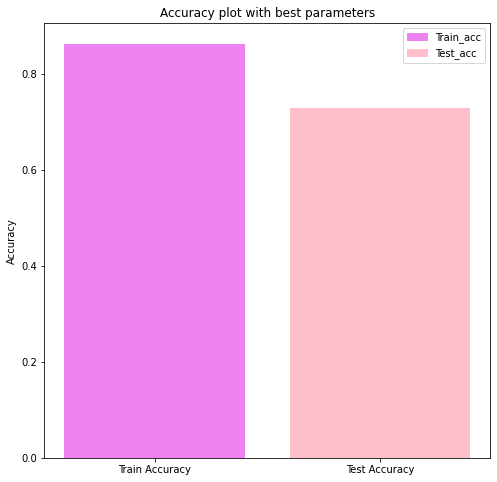

In [ ]:
#Vicualizing performance...

import matplotlib.patches as mpatches
data_model = [train_acc_model,test_acc_model]
labels = ['Train Accuracy','Test Accuracy']
plt.xticks(range(len(data_model)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot with best parameters')
plt.bar(range(len(data_model)), data_model,color=['violet','pink']) 
Train_acc = mpatches.Patch(color='violet', label='Train_acc')
Test_acc = mpatches.Patch(color='pink', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(8, 8)
plt.show()

# CNN approach!

In [ ]:
#preprocessing text functions, same thing....
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

tweets['tweet_text'] = tweets['tweet_text'].apply(lambda x: convert_emoji_in_text(x))
tweets['tweet_text'] = tweets['tweet_text'].apply(lambda x: convert_abbrev_in_text(x))

In [ ]:
X = []
sentences = list(tweets['tweet_text'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
y = tweets['sentiment_label']
y=tweets['sentiment_label']

In [ ]:
#to train and test set...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
#tokenizing!
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from numpy import asarray
from numpy import zeros
#loading glove file
embeddings_dictionary = dict()
from google.colab import drive
drive.mount('/content/drive') 
Path='drive/My Drive/Colab'


glove_file = open(Path+'/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#creating embedding matrix...
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
#creating CNN model
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          10641100  
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10,705,357
Trainable params: 64,257
Non-trainable params: 10,641,100
_________________________________________________________________
None


In [ ]:
#running training and test
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
800/800 [==============================] - 72s 89ms/step - loss: 0.5436 - acc: 0.7202 - val_loss: 0.5224 - val_acc: 0.7407
Epoch 2/6
800/800 [==============================] - 70s 87ms/step - loss: 0.4834 - acc: 0.7665 - val_loss: 0.4965 - val_acc: 0.7573
Epoch 3/6
800/800 [==============================] - 72s 90ms/step - loss: 0.4518 - acc: 0.7876 - val_loss: 0.5016 - val_acc: 0.7577
Epoch 4/6
800/800 [==============================] - 74s 92ms/step - loss: 0.4246 - acc: 0.8035 - val_loss: 0.4926 - val_acc: 0.7665
Epoch 5/6
800/800 [==============================] - 71s 89ms/step - loss: 0.3964 - acc: 0.8220 - val_loss: 0.5440 - val_acc: 0.7384
Epoch 6/6
1000/1000 [==============================] - 11s 11ms/step - loss: 0.5303 - acc: 0.7539


In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5303088426589966
Test Accuracy: 0.7538750171661377


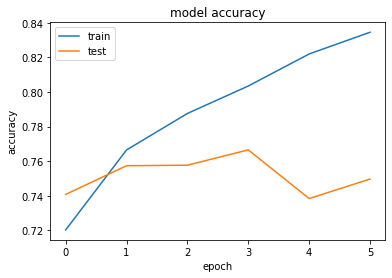

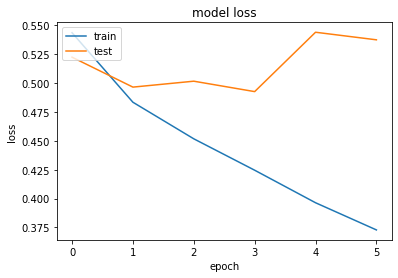

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()